In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import time

from scipy import stats, integrate
import matplotlib.pyplot as plt
import ggplot
import scipy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy.stats import reciprocal, uniform

import pylab as pl
from itertools import cycle
from sklearn import cross_validation
from sklearn.svm import SVC

/Users/davidleonardi/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/davidleonardi/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/davidleonardi/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/davidleonardi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into whi

In [2]:
def checkmetrics(pred, labels_test, name):
    sns.set()
    print('The accuracy of ', name, 'is: ', accuracy_score(pred, labels_test))
    matrix = confusion_matrix(labels_test, pred)
    ax = sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
    print(ax)
    print(classification_report(pred, labels_test))

There are six (6) classes of target variable

* LAYING
* SITTING 
* STANDING
* WALKING
* WALKING_DOWNSTAIRS
* WALKING_UPSTAIRS

In [3]:
num_classes = 6

In [4]:
train_df = pd.read_csv("data/human-activity-recognition-with-smartphones/train.csv")
test_df = pd.read_csv("data/human-activity-recognition-with-smartphones/test.csv")

In [5]:
train_df.shape

(7352, 563)

In [6]:
test_df.shape

(2947, 563)

In [7]:
train_df.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [8]:
### Extract features and labels from dataset for local testing:
target_train_df = train_df.filter(items=["Activity"])
target_test_df = test_df.filter(items=["Activity"])

target_train_df['Activity'] = pd.Categorical(target_train_df.Activity)
target_test_df['Activity'] = pd.Categorical(target_test_df.Activity)

target_train_cat_df = target_train_df.copy()
target_test_cat_df = target_test_df.copy()

target_train_cat_df['Code'] = target_train_cat_df['Activity'].cat.codes
target_test_cat_df['Code'] = target_test_cat_df['Activity'].cat.codes

features_train_df = train_df.drop("Activity", axis=1)
features_test_df = test_df.drop("Activity", axis=1)

target_train_cat_df = target_train_cat_df.drop("Activity", axis=1)
target_test_cat_df = target_test_cat_df.drop("Activity", axis=1)

features_train = features_train_df.as_matrix()
features_test = features_test_df.as_matrix()

target_test = target_test_df.as_matrix().ravel()
target_train = target_train_df.as_matrix().ravel()

target_train_cat = target_train_cat_df.as_matrix().ravel()
target_test_cat = target_test_cat_df.as_matrix().ravel()

In [85]:
train_processed_df = pd.concat([features_train_df, target_train_df, target_train_cat_df], axis=1)
train_processed_df.to_csv("data/train_processed.csv")

test_processed_df = pd.concat([features_test_df, target_test_df, target_test_cat_df], axis=1)
test_processed_df.to_csv("data/test_processed.csv")

# Baseline Approach

## C-Support Vector Classification

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   20.7s remaining:   31.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.3s finished


The train score: 0.9579706202393906 with parameters: {}
The accuracy of  C-Support Vector Classification is:  0.9307770614183916
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.90      0.88       466
          STANDING       0.92      0.88      0.90       555
           WALKING       1.00      0.90      0.94       550
WALKING_DOWNSTAIRS       0.85      0.99      0.92       362
  WALKING_UPSTAIRS       0.95      0.94      0.94       477

       avg / total       0.93      0.93      0.93      2947

Running for 46.01766300201416 seconds


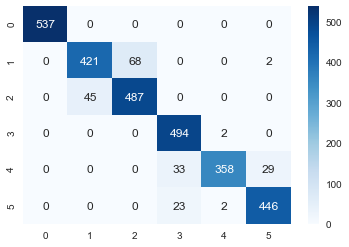

In [9]:
#svm.SVC  C-Support Vector Classification.
start_time = time.time()

parameters ={}
SVM = svm.SVC()

grid_search_cv = GridSearchCV(SVM, parameters, cv=5, n_jobs=-1, return_train_score=True, refit=True, verbose=1)
grid_search_cv.fit(features_train, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test)

checkmetrics(pred, target_test, 'C-Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

## Linear Support Vector Classification

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.7s remaining:   10.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


The train score: 0.9949673558215452 with parameters: {}
The accuracy of  Linear Support Vector Classification is:  0.9647098744485918
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       539
           SITTING       0.87      0.97      0.92       436
          STANDING       0.98      0.90      0.94       579
           WALKING       1.00      0.96      0.98       516
WALKING_DOWNSTAIRS       0.98      1.00      0.99       413
  WALKING_UPSTAIRS       0.96      0.98      0.97       464

       avg / total       0.97      0.96      0.96      2947

Running for 11.798335313796997 seconds


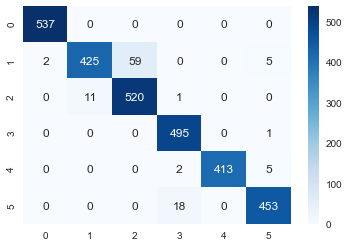

In [10]:
start_time = time.time()

parameters ={}
SVM = LinearSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test)

checkmetrics(pred, target_test, 'Linear Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

## Nu-Support Vector Classification

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   55.9s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   56.1s finished


The train score: 0.9503536452665942 with parameters: {}
The accuracy of  Nu-Support Vector Classification is:  0.9205972175093315
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       536
           SITTING       0.87      0.92      0.89       467
          STANDING       0.92      0.89      0.91       552
           WALKING       1.00      0.86      0.92       574
WALKING_DOWNSTAIRS       0.75      0.99      0.86       321
  WALKING_UPSTAIRS       0.95      0.90      0.92       497

       avg / total       0.93      0.92      0.92      2947

Running for 122.72457003593445 seconds


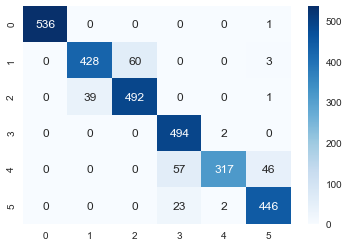

In [11]:
start_time = time.time()

# defaults: nu=0.5, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
parameters = {}
SVM = NuSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test)

checkmetrics(pred, target_test, 'Nu-Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

# Feature Selection using XGBoost Feature Importance

In [61]:
import xgboost as xgb
import operator

start_time = time.time()

xgb_params = {
    'eta': 0.037,
    'max_depth': 5,
    'subsample': 0.80,
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'lambda': 0.8,   
    'alpha': 0.4,
    'silent': 1,
    'num_class': num_classes
}

dtrain = xgb.DMatrix(features_train_df, target_train_cat_df)
dtest = xgb.DMatrix(features_test_df, target_test_cat_df)

num_boost_rounds = 250

watchlist = [(dtrain, 'train'), (dtest, 'test')]

# train model
xgb_model = xgb.train(xgb_params, dtrain, num_boost_rounds, watchlist)

print("Running for %s seconds" % (time.time() - start_time))

[0]	train-mlogloss:1.6946	test-mlogloss:1.70898
[1]	train-mlogloss:1.60721	test-mlogloss:1.6351
[2]	train-mlogloss:1.5274	test-mlogloss:1.56671
[3]	train-mlogloss:1.45462	test-mlogloss:1.50424
[4]	train-mlogloss:1.38701	test-mlogloss:1.4465
[5]	train-mlogloss:1.32439	test-mlogloss:1.39337
[6]	train-mlogloss:1.26603	test-mlogloss:1.34342
[7]	train-mlogloss:1.21157	test-mlogloss:1.29542
[8]	train-mlogloss:1.16042	test-mlogloss:1.25132
[9]	train-mlogloss:1.11231	test-mlogloss:1.20931
[10]	train-mlogloss:1.0674	test-mlogloss:1.16904
[11]	train-mlogloss:1.02508	test-mlogloss:1.13162
[12]	train-mlogloss:0.984676	test-mlogloss:1.09599
[13]	train-mlogloss:0.946549	test-mlogloss:1.06251
[14]	train-mlogloss:0.910005	test-mlogloss:1.03123
[15]	train-mlogloss:0.875612	test-mlogloss:1.00159
[16]	train-mlogloss:0.84312	test-mlogloss:0.972506
[17]	train-mlogloss:0.812368	test-mlogloss:0.945535
[18]	train-mlogloss:0.782585	test-mlogloss:0.919452
[19]	train-mlogloss:0.754433	test-mlogloss:0.894029
[20]

[159]	train-mlogloss:0.021675	test-mlogloss:0.194296
[160]	train-mlogloss:0.02129	test-mlogloss:0.193981
[161]	train-mlogloss:0.020886	test-mlogloss:0.193487
[162]	train-mlogloss:0.020498	test-mlogloss:0.192806
[163]	train-mlogloss:0.020157	test-mlogloss:0.192378
[164]	train-mlogloss:0.019856	test-mlogloss:0.191821
[165]	train-mlogloss:0.019555	test-mlogloss:0.191075
[166]	train-mlogloss:0.019209	test-mlogloss:0.190307
[167]	train-mlogloss:0.018903	test-mlogloss:0.189552
[168]	train-mlogloss:0.01859	test-mlogloss:0.189362
[169]	train-mlogloss:0.018288	test-mlogloss:0.188467
[170]	train-mlogloss:0.018011	test-mlogloss:0.18789
[171]	train-mlogloss:0.017726	test-mlogloss:0.187349
[172]	train-mlogloss:0.017427	test-mlogloss:0.186822
[173]	train-mlogloss:0.017123	test-mlogloss:0.186072
[174]	train-mlogloss:0.016871	test-mlogloss:0.185515
[175]	train-mlogloss:0.016601	test-mlogloss:0.185107
[176]	train-mlogloss:0.016324	test-mlogloss:0.184933
[177]	train-mlogloss:0.016077	test-mlogloss:0.184

Running for 1.0037801265716553 seconds


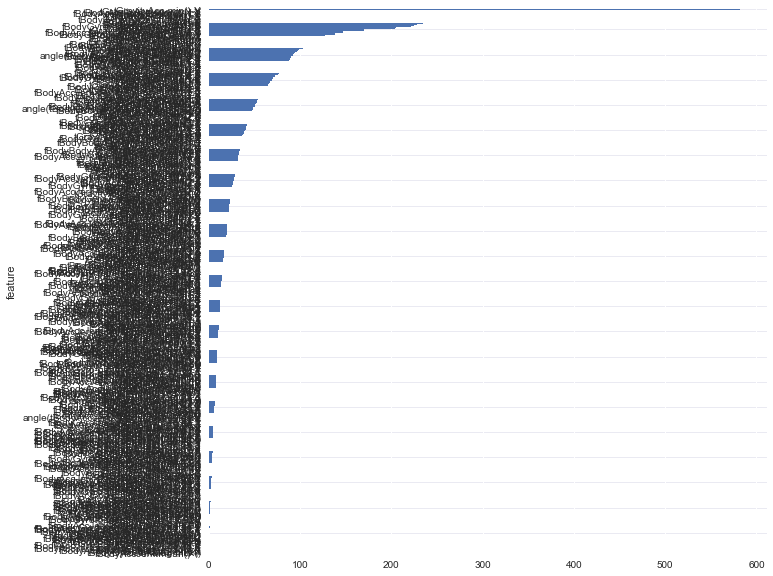

In [65]:
start_time = time.time()

importance = xgb_model.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))

importance_df = pd.DataFrame(importance, columns=['feature', 'fscore'])

# Plot Feature Importance
plt.figure()
importance_df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(10, 10))

print("Running for %s seconds" % (time.time() - start_time))

In [66]:
def feature_selection(dataframe, importance_scores_df, threshold=0.4):
    normalized_df = importance_scores_df.copy()
    normalized_df['fscore'] = (importance_scores_df['fscore'] - importance_scores_df['fscore'].min())/(importance_scores_df['fscore'].max()-importance_scores_df['fscore'].min())
    normalized_df = normalized_df[normalized_df['fscore'] >= threshold]
    new_dataframe = dataframe.filter(items=normalized_df['feature'].tolist())
    return new_dataframe

## Keep impotant features within one standard deviation

In [95]:
# one standard deviation away from the best feature
threshold_1std = 1 - 0.6827

features_train_1std_df = feature_selection(features_train_df, importance_df, threshold=threshold_1std)
features_train_1std = features_train_1std_df.as_matrix()

features_test_1std_df = feature_selection(features_test_df, importance_df, threshold=threshold_1std)
features_test_1std = features_test_1std_df.as_matrix()

In [96]:
features_train_1std.shape

(7352, 19)

In [97]:
features_test_1std.shape

(2947, 19)

## C-Support Vector Classification with XGBoost 1 sd (19 features)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


The train score: 0.9488574537540805 with parameters: {}
The accuracy of  C-Support Vector Classification is:  0.833389888021717
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.74      0.89      0.81       409
          STANDING       0.91      0.79      0.85       613
           WALKING       0.90      0.71      0.79       627
WALKING_DOWNSTAIRS       0.75      0.85      0.80       372
  WALKING_UPSTAIRS       0.66      0.79      0.72       389

       avg / total       0.85      0.83      0.83      2947

Running for 3.395293951034546 seconds


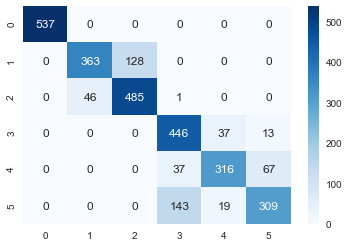

In [115]:
#svm.SVC  C-Support Vector Classification.
start_time = time.time()

parameters ={}
SVM = svm.SVC()

grid_search_cv = GridSearchCV(SVM, parameters, cv=5, n_jobs=-1, return_train_score=True, refit=True, verbose=1)
grid_search_cv.fit(features_train_1std, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_1std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_1std)

checkmetrics(pred, target_test, 'C-Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

## Linear Support Vector Classification with XGBoost 1 sd (19 features)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


The train score: 0.9212459194776932 with parameters: {}
The accuracy of  Linear Support Vector Classification is:  0.8812351543942993
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       0.96      1.00      0.98       517
           SITTING       0.74      0.89      0.81       407
          STANDING       0.91      0.78      0.84       618
           WALKING       0.97      0.87      0.91       553
WALKING_DOWNSTAIRS       0.85      0.93      0.89       385
  WALKING_UPSTAIRS       0.84      0.85      0.84       467

       avg / total       0.89      0.88      0.88      2947

Running for 2.7281100749969482 seconds


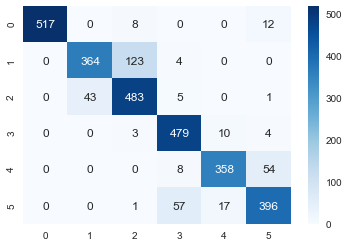

In [99]:
start_time = time.time()

parameters ={}
SVM = LinearSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_1std, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_1std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_1std)

checkmetrics(pred, target_test, 'Linear Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

## Nu-Support Vector Classification with XGBoost 1 sd (19 features)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished


The train score: 0.9428726877040261 with parameters: {}
The accuracy of  Nu-Support Vector Classification is:  0.837461825585341
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.75      0.88      0.81       417
          STANDING       0.90      0.80      0.85       603
           WALKING       0.93      0.71      0.80       649
WALKING_DOWNSTAIRS       0.74      0.90      0.81       342
  WALKING_UPSTAIRS       0.66      0.78      0.72       399

       avg / total       0.85      0.84      0.84      2947

Running for 7.936104774475098 seconds


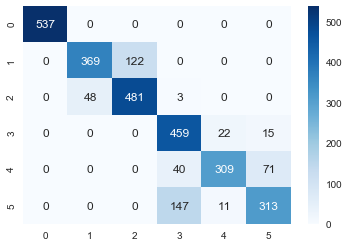

In [100]:
start_time = time.time()

# defaults: nu=0.5, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
parameters = {}
SVM = NuSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_1std, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_1std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_1std)

checkmetrics(pred, target_test, 'Nu-Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

## Keep impotant features within two standard deviation

In [101]:
# two standard deviation away from the best feature
threshold_2std = 1 - 0.9545

features_train_2std_df = feature_selection(features_train_df, importance_df, threshold=threshold_2std)
features_train_2std = features_train_2std_df.as_matrix()

features_test_2std_df = feature_selection(features_test_df, importance_df, threshold=threshold_2std)
features_test_2std = features_test_2std_df.as_matrix()

In [104]:
features_train_2std.shape

(7352, 165)

## C-Support Vector Classification with XGBoost 2 sd (165 features)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.4s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.6s finished


The train score: 0.9766050054406964 with parameters: {}
The accuracy of  C-Support Vector Classification is:  0.9300984051577876
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.90      0.88       469
          STANDING       0.91      0.88      0.90       552
           WALKING       1.00      0.87      0.93       567
WALKING_DOWNSTAIRS       0.88      0.99      0.93       372
  WALKING_UPSTAIRS       0.92      0.96      0.94       450

       avg / total       0.93      0.93      0.93      2947

Running for 12.729065895080566 seconds


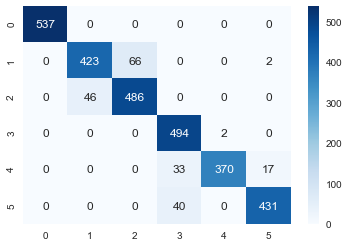

In [116]:
#svm.SVC  C-Support Vector Classification.
start_time = time.time()

parameters ={}
SVM = svm.SVC()

grid_search_cv = GridSearchCV(SVM, parameters, cv=5, n_jobs=-1, return_train_score=True, refit=True, verbose=1)
grid_search_cv.fit(features_train_2std, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_2std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_2std)

checkmetrics(pred, target_test, 'C-Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

## Linear Support Vector Classification with XGBoost 2 sd (165 features)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.2s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished


The train score: 0.9907508161044614 with parameters: {}
The accuracy of  Linear Support Vector Classification is:  0.9552086868001357
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.96      0.91       439
          STANDING       0.97      0.89      0.93       579
           WALKING       0.99      0.93      0.96       526
WALKING_DOWNSTAIRS       0.97      0.99      0.98       414
  WALKING_UPSTAIRS       0.93      0.97      0.95       452

       avg / total       0.96      0.96      0.96      2947

Running for 4.397849082946777 seconds


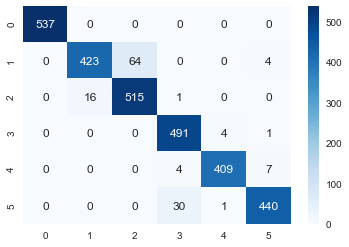

In [105]:
start_time = time.time()

parameters ={}
SVM = LinearSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_2std, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_2std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_2std)

checkmetrics(pred, target_test, 'Linear Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

## Nu-Support Vector Classification with XGBoost 2 sd (165 features)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.8s remaining:   25.2s


The train score: 0.9616430903155604 with parameters: {}
The accuracy of  Nu-Support Vector Classification is:  0.9243298269426535
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       536
           SITTING       0.86      0.90      0.88       466
          STANDING       0.91      0.88      0.90       551
           WALKING       1.00      0.86      0.92       577
WALKING_DOWNSTAIRS       0.81      0.99      0.89       342
  WALKING_UPSTAIRS       0.95      0.94      0.95       475

       avg / total       0.93      0.92      0.92      2947

Running for 37.78576874732971 seconds


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.0s finished


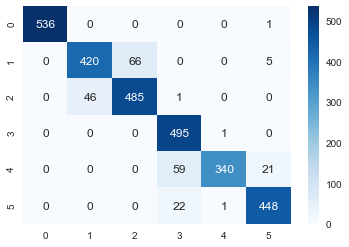

In [106]:
start_time = time.time()

# defaults: nu=0.5, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
parameters = {}
SVM = NuSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_2std, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_2std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_2std)

checkmetrics(pred, target_test, 'Nu-Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

## Keep impotant features within three standard deviation

In [110]:
# three standard deviation away from the best feature
threshold_3std = 1 - 0.9973

features_train_3std_df = feature_selection(features_train_df, importance_df, threshold=threshold_3std)
features_train_3std = features_train_3std_df.as_matrix()

features_test_3std_df = feature_selection(features_test_df, importance_df, threshold=threshold_3std)
features_test_3std = features_test_3std_df.as_matrix()

In [111]:
features_train_3std.shape

(7352, 473)

## C-Support Vector Classification with XGBoost 3 sd (473 features)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.8s remaining:   26.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.4s finished


The train score: 0.9635473340587595 with parameters: {}
The accuracy of  C-Support Vector Classification is:  0.9341703427214116
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.87      0.91      0.89       470
          STANDING       0.92      0.89      0.90       551
           WALKING       1.00      0.90      0.94       551
WALKING_DOWNSTAIRS       0.85      0.99      0.92       362
  WALKING_UPSTAIRS       0.95      0.94      0.95       476

       avg / total       0.94      0.93      0.93      2947

Running for 39.07571983337402 seconds


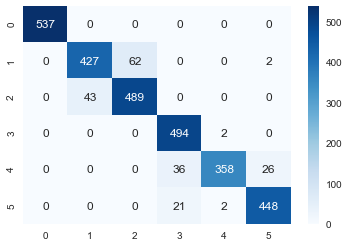

In [117]:
#svm.SVC  C-Support Vector Classification.
start_time = time.time()

parameters ={}
SVM = svm.SVC()

grid_search_cv = GridSearchCV(SVM, parameters, cv=5, n_jobs=-1, return_train_score=True, refit=True, verbose=1)
grid_search_cv.fit(features_train_3std, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_3std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_3std)

checkmetrics(pred, target_test, 'C-Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

## Linear Support Vector Classification with XGBoost 3 sd (473 features)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.5s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.7s finished


The train score: 0.9923830250272034 with parameters: {}
The accuracy of  Linear Support Vector Classification is:  0.9623345775364778
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       539
           SITTING       0.83      0.99      0.90       414
          STANDING       0.99      0.87      0.93       602
           WALKING       1.00      0.96      0.98       517
WALKING_DOWNSTAIRS       0.99      1.00      0.99       415
  WALKING_UPSTAIRS       0.97      0.99      0.98       460

       avg / total       0.97      0.96      0.96      2947

Running for 9.93530797958374 seconds


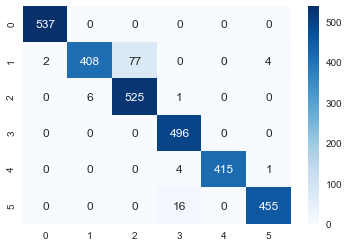

In [113]:
start_time = time.time()

parameters ={}
SVM = LinearSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_3std, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_3std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_3std)

checkmetrics(pred, target_test, 'Linear Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

## Nu-Support Vector Classification with XGBoost 3 sd (473 features)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   49.0s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   49.3s finished


The train score: 0.9533460282916213 with parameters: {}
The accuracy of  Nu-Support Vector Classification is:  0.9202578893790295
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       536
           SITTING       0.86      0.91      0.89       463
          STANDING       0.92      0.88      0.90       556
           WALKING       1.00      0.86      0.92       573
WALKING_DOWNSTAIRS       0.76      0.99      0.86       325
  WALKING_UPSTAIRS       0.95      0.90      0.93       494

       avg / total       0.93      0.92      0.92      2947

Running for 106.23940896987915 seconds


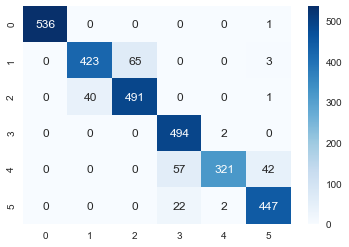

In [114]:
start_time = time.time()

# defaults: nu=0.5, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
parameters = {}
SVM = NuSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_3std, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_3std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_3std)

checkmetrics(pred, target_test, 'Nu-Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

# Hyperparameters Tuning using Grid Search Cross Validation

## C-Support Vector Classification with XGBoost 3 sd (473 features)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


The train score: 0.9776931447225244 with parameters: {'C': 4.973223658095508, 'gamma': 0.0010439739446959039}
The accuracy of  C-Support Vector Classification is:  0.9443501866304717
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.87      0.94      0.91       457
          STANDING       0.95      0.89      0.92       564
           WALKING       1.00      0.90      0.95       546
WALKING_DOWNSTAIRS       0.89      0.99      0.94       377
  WALKING_UPSTAIRS       0.94      0.95      0.95       466

       avg / total       0.95      0.94      0.94      2947

Running for 78.53584504127502 seconds


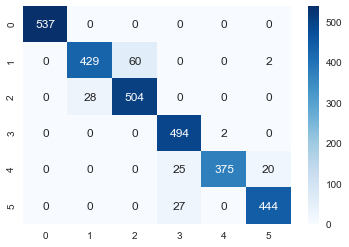

In [118]:
#svm.SVC  C-Support Vector Classification.
start_time = time.time()

SVM = svm.SVC()

parameters = {
    "gamma": reciprocal(0.001, 0.1), 
    "C": uniform(1, 10)
}

rnd_search_cv = RandomizedSearchCV(SVM, parameters, cv=3, n_jobs=-1, return_train_score=True, refit=True, verbose=1)
rnd_search_cv.fit(features_train_3std, target_train)
resultsdf = pd.DataFrame(rnd_search_cv.cv_results_)
print("The train score:", str(rnd_search_cv.score(features_train_3std, target_train)), "with parameters:", rnd_search_cv.best_params_)
pred = rnd_search_cv.best_estimator_.predict(features_test_3std)

# parameters ={
#          'C': [0.005,0.01,0.05,0.1,0.25,0.5,0.75,1.0,2.0],
#          'kernel': ['linear','poly','rbf'],
#          'degree': [2,3,4,5,6],
#         'gamma': [1e-3,1e-2,1,2,'auto'],
#         'tol' : [1e-4],
#         'decision_function_shape' : ['ovo','ovr'],
# }
# grid_search_cv = GridSearchCV(SVM, parameters, cv=5, n_jobs=-1, return_train_score=True, refit=True, verbose=1)
# grid_search_cv.fit(features_train_3std, target_train)
# resultsdf = pd.DataFrame(grid_search_cv.cv_results_)
# print("The train score:", str(grid_search_cv.score(features_train_3std, target_train)), "with parameters:", grid_search_cv.best_params_)
# pred = grid_search_cv.best_estimator_.predict(features_test_3std)

checkmetrics(pred, target_test, 'C-Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

## Linear Support Vector Classification with XGBoost 3 sd (473 features)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  1.0min finished


The train score: 0.9933351468988031 with parameters: {'C': 0.4001907324639531}
The accuracy of  Linear Support Vector Classification is:  0.9623345775364778
AxesSubplot(0.125,0.125;0.62x0.755)
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       538
           SITTING       0.86      0.97      0.91       435
          STANDING       0.98      0.89      0.93       581
           WALKING       1.00      0.95      0.97       522
WALKING_DOWNSTAIRS       0.98      1.00      0.99       411
  WALKING_UPSTAIRS       0.96      0.98      0.97       460

       avg / total       0.96      0.96      0.96      2947

Running for 65.25136399269104 seconds


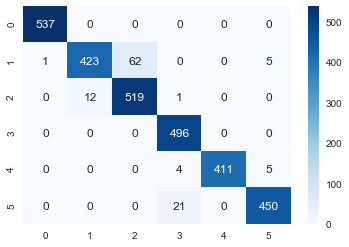

In [121]:
start_time = time.time()

SVM = LinearSVC()

parameters = {
    "C": uniform(0.01, 10)
}

rnd_search_cv = RandomizedSearchCV(SVM, parameters, cv=3, n_jobs=-1, n_iter=50, return_train_score=True, refit=True, verbose=1)
rnd_search_cv.fit(features_train_3std, target_train)
resultsdf = pd.DataFrame(rnd_search_cv.cv_results_)
print("The train score:", str(rnd_search_cv.score(features_train_3std, target_train)), "with parameters:", rnd_search_cv.best_params_)
pred = rnd_search_cv.best_estimator_.predict(features_test_3std)

# parameters ={
#     'penalty' : ['l2'], #Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.
#     'loss' : ['squared_hinge'], #Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.
#     'dual' : ['False'], #Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.
#     'tol' : [1e-5,1e-4,1e-3],
#     'C': [0.05,0.1,0.5,0.8,1.0,2.0,5.0,10.0,15.0],
#     'multi_class'  : ['ovr','crammer_singer'],
#     'random_state' : [42],
#     'tol' : [1e-4],
#     'max_iter' : [1000],
# }

# grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
# grid_search_cv.fit(features_train_3std, target_train)
# resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
# print("The train score:", str(grid_search_cv.score(features_train_3std, target_train)), "with parameters:", grid_search_cv.best_params_)
# pred = grid_search_cv.best_estimator_.predict(features_test_3std)

checkmetrics(pred, target_test, 'Linear Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))

## Nu-Support Vector Classification with XGBoost 3 sd (473 features)

In [ ]:
start_time = time.time()

# defaults: nu=0.5, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
parameters = {}
SVM = NuSVC()
grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train_3std, target_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train_3std, target_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test_3std)

checkmetrics(pred, target_test, 'Nu-Support Vector Classification')

print("Running for %s seconds" % (time.time() - start_time))